**28 September 2020**

# Clustering

## Admin

* Problem set 4 due Tuesday night by 11:59pm
* Response to Allison et al. due by Tuesday evening at 9:00pm (optional; second response due no later than next week).

## Supervised and unsupervised learning

* "Clustering" is a type of *unsupervised* learning
* "Classification" (next week) is a type of *supervised* learning
* Both seek to assign a finite set of labels to input objects on the basis of features associated with those objects
* In *supervised* learning, you know the labels in advance
    * You supply a set of (correctly) labeled objects to the algorithm
    * The algorithm then "learns" which features are associated with which labels, so as to minimize classification errors
* In *unsupervised* learning, you don't know the labels (though you might know how many labels there should be)
    * You supply a feature matrix and a definition of what a "good" clustering (label set) should be
    * The algorithm then assigns labels to the input objects so as to best satisfy the supplied definition of "good" (typically, minimizing variance within clusters and maximizing difference between clusters)

## Why prefer one or the other?

* Unsupervised methods are often used early in a project, when you're looking for unknown stucture in your data
    * Unsupervised methods are your only option if you don't know what the appropriate set of labels might be for your data set
    * Also appropriate if you don't have (many) labeled instances
    * Unsupervised methods are typically "cheap" to set up, but costly to evaluate
* Supervised methods require you to know in advance the full set of appropriate labels for your data
    * Supervised methods often have high initial costs, but are easier to evaluate (because you already have a set of correctly labeled instances that you can use for validation).

## Cluster boundaries

[sketch the problem]

* Note that not all clusters have the same general shape
* Spherical blobs, separate linear blobs, areas of varying density, etc.
* There is no universally best way to draw decision boundaries

## *k*-means clustering

The algorithm:

1. Select *k* objects from the data set to serve as initial cluster centers ("centroids")
1. Assign each object in the data set to the nearest centroid. These are your initial clusters.
1. Calculate the mean location of the objects assigned to each cluster. These are your new centroids.
1. If the new centroids are sufficiently close to the previous centroids, you're done.
    1. If the new centroids are not sufficiently close to the old centroids, use the new centroids as the basis for a new clusering.
    1. Repeat labeling, centroid calculation, and difference comparison until centroids are stable (enough).

## Other clustering methods

* Ward (hierarchical), agglomerative
* Density-based (DBSCAN)
* Graph distance
* ...

## An artificial example

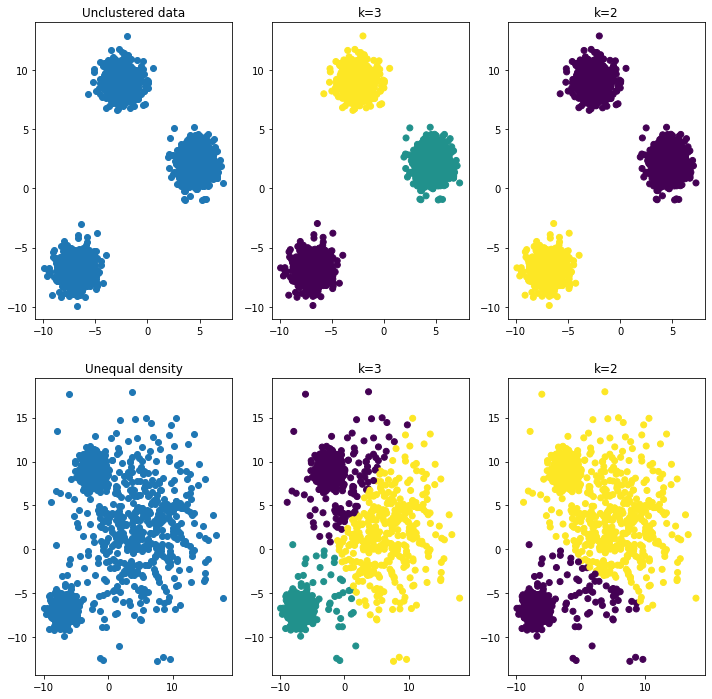

In [14]:
# k-Means on articial data
# Adapted from sklearn examples

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Unlabeled data

plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Unclustered data")

# Correct number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k=3")


# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(233)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k=2")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 5.0, 1.0],
                                random_state=random_state)

plt.subplot(234)
plt.scatter(X_varied[:, 0], X_varied[:, 1])
plt.title("Unequal density")

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(235)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("k=3")

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_varied)

plt.subplot(236)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("k=2")


plt.show()

## Texts as high-dimensional data

As noted in the last problem set, we usually deal with far more than 2 dimensions of texts. If we use word counts as our features, it's easy to have 10,000 or 100,000 or more dimensions in our dat set. We'll talk about this in a future lecture, but note for now that the problem of high-dimensional feature space is that **everything becomes far away from everything else**. This makes distance metrics and density measures less meaningful than they are in low-dimensional spaces.

One solution is **dimension reduction**, which ranges from the relatively simple (principal component analysis) to the very complex, indeed (vector embeddings).